Raditya Aji Sasmoyo (2010631170111) 

Nanda Sukarno Wijaya (2010631170154)

Awalnya, Harusnya =
Hitung: Jenis-jenisnya, Merge Prediktor & Target

#Data Pre-processing

#DM Prak 8

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

#Table 1 Dataset 2018-2019

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
df1 = pd.read_csv("https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/kematian_jawa_barat.csv")
df1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kematian,jenis_kelamin,jumlah_kematian,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK BALITA,LAKI-LAKI,0,JIWA,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK BALITA,PEREMPUAN,1,JIWA,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BAYI,LAKI-LAKI,59,JIWA,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,BAYI,PEREMPUAN,50,JIWA,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,NEONATAL,LAKI-LAKI,51,JIWA,2018


#Table 2 Drop Unused Column

In [ ]:
df2 = df1[['nama_kabupaten_kota', 'jenis_kematian', 'jumlah_kematian']]
df2.head()

,nama_kabupaten_kota,jenis_kematian,jumlah_kematian
0,KABUPATEN BOGOR,ANAK BALITA,0
1,KABUPATEN BOGOR,ANAK BALITA,1
2,KABUPATEN BOGOR,BAYI,59
3,KABUPATEN BOGOR,BAYI,50
4,KABUPATEN BOGOR,NEONATAL,51


In [ ]:
df2.isnull().sum()

nama_kabupaten_kota    0
jenis_kematian         0
jumlah_kematian        0
dtype: int64

#Table 3 Data Transformation

In [ ]:
df3 = df2['jenis_kematian']
df3 = pd.get_dummies(df3, columns=['jenis_kematian'])
df2 = df2.join(df3)
df4 = df2.rename(columns={'ANAK BALITA': 'jenis_kematian_anak_balita', 'BAYI': 'jenis_kematian_bayi', 'NEONATAL': 'jenis_kematian_neonatal'})
df5 = df4[['nama_kabupaten_kota', 'jenis_kematian_anak_balita', 'jenis_kematian_bayi', 'jenis_kematian_neonatal', 'jumlah_kematian']]
df5.head()

,nama_kabupaten_kota,jenis_kematian_anak_balita,jenis_kematian_bayi,jenis_kematian_neonatal,jumlah_kematian
0,KABUPATEN BOGOR,1,0,0,0
1,KABUPATEN BOGOR,1,0,0,1
2,KABUPATEN BOGOR,0,1,0,59
3,KABUPATEN BOGOR,0,1,0,50
4,KABUPATEN BOGOR,0,0,1,51


In [ ]:
df6 = df5.groupby(['jenis_kematian_anak_balita', 'jenis_kematian_bayi', 'jenis_kematian_neonatal'])['nama_kabupaten_kota'].apply(', '.join).reset_index()
df6

,jenis_kematian_anak_balita,jenis_kematian_bayi,jenis_kematian_neonatal,nama_kabupaten_kota
0,0,0,1,"KABUPATEN BOGOR, KABUPATEN BOGOR, KABUPATEN SU..."
1,0,1,0,"KABUPATEN BOGOR, KABUPATEN BOGOR, KABUPATEN SU..."
2,1,0,0,"KABUPATEN BOGOR, KABUPATEN BOGOR, KABUPATEN SU..."


In [ ]:
df7 = pd.read_csv("https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/kematian_transform_jawa_barat.csv")
df7

,nama_kabupaten_kota,jenis_kematian_anak_balita,jenis_kematian_bayi,jenis_kematian_neonatal,total_kematian
0,KABUPATEN BOGOR,7,213,185,405
1,KABUPATEN SUKABUMI,0,0,0,0
2,KABUPATEN CIANJUR,3,79,70,152
3,KABUPATEN BANDUNG,15,421,379,815
4,KABUPATEN GARUT,2,271,255,528
5,KABUPATEN TASIKMALAYA,33,442,343,818
6,KABUPATEN CIAMIS,29,207,156,392
7,KABUPATEN KUNINGAN,5,147,117,269
8,KABUPATEN CIREBON,15,269,243,527
9,KABUPATEN MAJALENGKA,4,83,68,155


#Graph

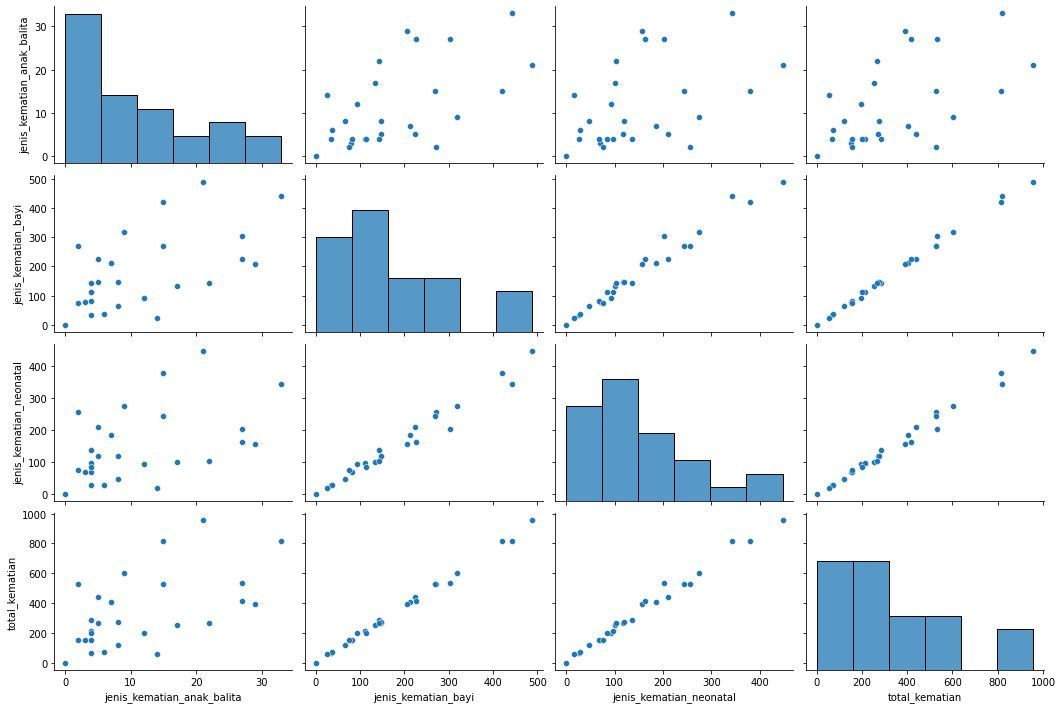

In [ ]:
sns.pairplot(df7, aspect=1.5)
plt.show()

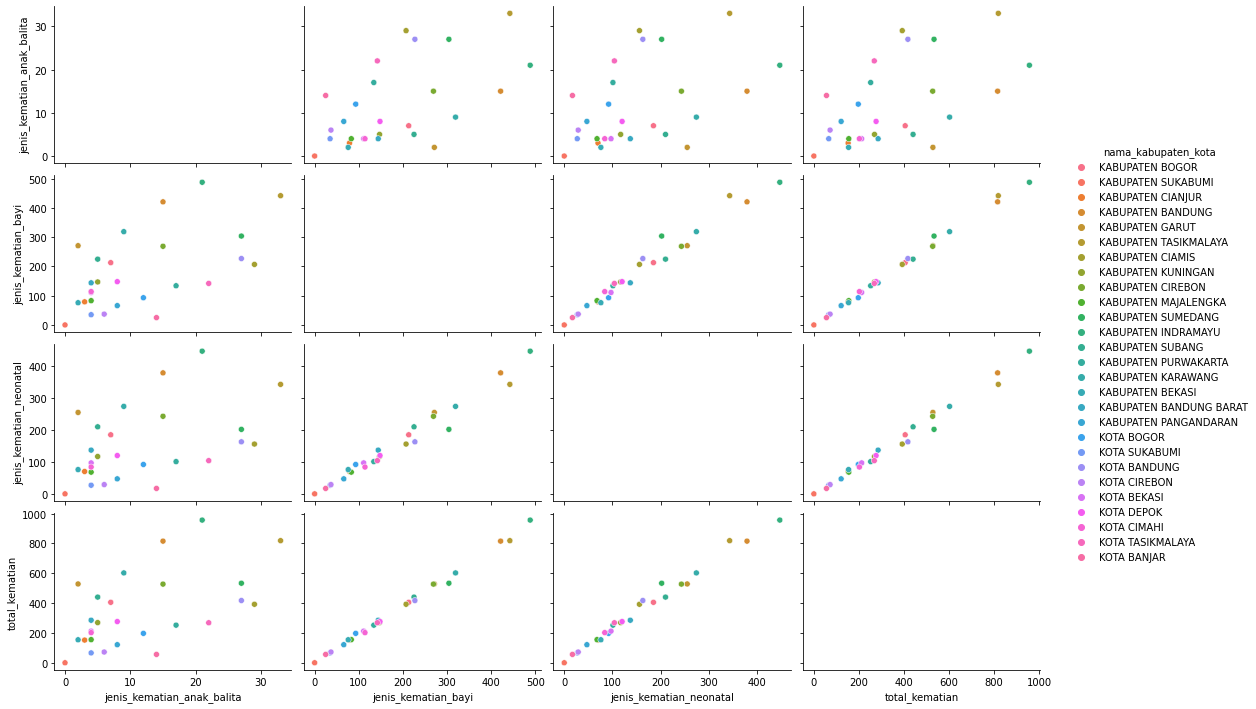

In [ ]:
sns.pairplot(df7, hue='nama_kabupaten_kota', aspect=1.5)
plt.show()

#Outlier

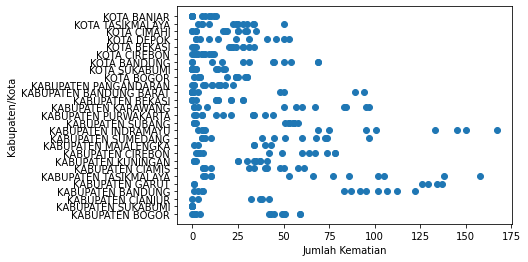

In [ ]:
plt.scatter(df1['jumlah_kematian'], df1['nama_kabupaten_kota'])
plt.xlabel('Jumlah Kematian')
plt.ylabel('Kabupaten/Kota')
plt.show()

#K-Means Clustering



#1. Base Model Method

In [ ]:
n_clusters = 3
model_base = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
model_base.fit(X)
inertia = model_base.inertia_
centroids = model_base.cluster_centers_
labels = model_base.labels_
print(f"Inertia: {inertia}")
print(f"Centroids:\n{pd.DataFrame(centroids)}")

In [ ]:
print("{}\n{}".format(centroids[:,0], centroids[:,1]))

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200)
plt.title('Income vs Spending Score', fontsize=18)
plt.show()

#2. Elbow Method (Best Cluster Selection)

K : 1 Inertia : 2391726.5185185187
K : 2 Inertia : 737328.8684210527
K : 3 Inertia : 267485.9583333334
K : 4 Inertia : 137911.08333333337
K : 5 Inertia : 82935.83333333334
K : 6 Inertia : 50818.361904761914
K : 7 Inertia : 30780.02857142857
K : 8 Inertia : 22290.433333333334
K : 9 Inertia : 16001.600000000002


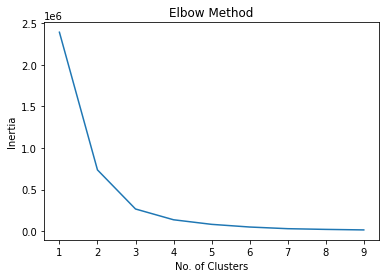

In [ ]:
X = df7.drop("nama_kabupaten_kota",axis=1)
clusters = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  clusters.append(kmeans.inertia_)
  print('K : '+str(i)+' Inertia : '+str(kmeans.inertia_))
plt.plot(range(1,10),clusters)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

inertia kecil=n_cluster tinggi=sulit analisa. Elbow Method=titik tengah=gambar siku. 

#Another Elbow Method

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,10),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,10],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

#Cluster Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


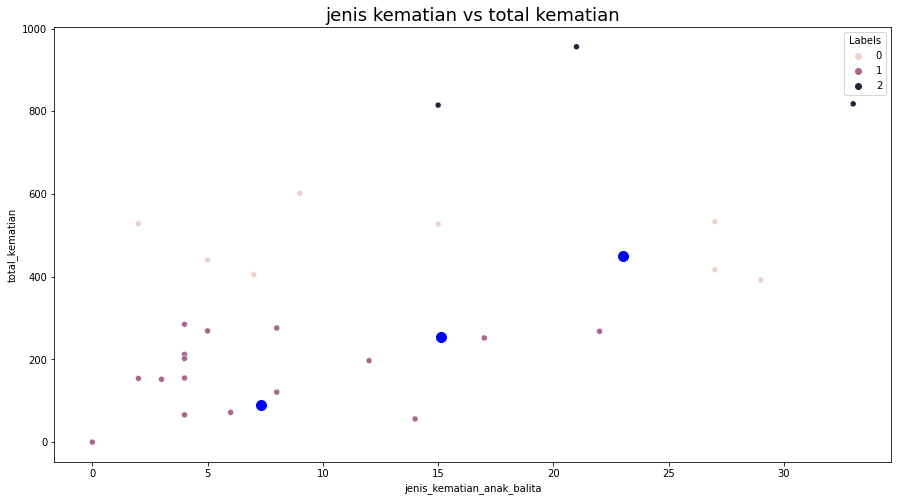

In [ ]:
n_clustter = 3
km = KMeans(n_clusters=n_clustter, init='k-means++', random_state=0)
km.fit(X)
centroids = km.cluster_centers_
X['Labels'] = km.labels_
plt.figure(figsize=(15,8))
sns.scatterplot(X['jenis_kematian_anak_balita'], X['total_kematian'], hue=X['Labels'])
plt.scatter(centroids[:,0], centroids[:,1], c='blue', s=100)
plt.title('jenis kematian vs total kematian', fontsize=18)
plt.show()

#Evaluation 

nilai silhoutee makin 1=data tdk terdempet

n_cluster 3=nilai silhoutee=0.4 = lbh baik n_cluster 5

#Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_score
pred = km.fit_predict(X)
shil_avg = silhouette_score(X, pred)
print('Nilai Rata - Rata Silhouette : '+str(shil_avg))

Nilai Rata - Rata Silhouette : 0.6426808712264546


#Result Interpretation

In [ ]:
X['Labels']

0     0
1     1
2     1
3     2
4     0
5     2
6     0
7     1
8     0
9     1
10    0
11    2
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    1
20    0
21    1
22    1
23    1
24    1
25    1
26    1
Name: Labels, dtype: int32

In [ ]:
print(X.sort_values(by='Labels'))

    jenis_kematian_anak_balita  jenis_kematian_bayi  jenis_kematian_neonatal  \
0                            7                  213                      185   
4                            2                  271                      255   
6                           29                  207                      156   
20                          27                  227                      163   
8                           15                  269                      243   
10                          27                  304                      202   
12                           5                  225                      210   
14                           9                  319                      274   
24                           4                  114                       84   
23                           8                  148                      120   
22                           4                  111                       97   
21                           6          

In [ ]:
#Table 4 Hasil Pengelompokan
#Label di atas diubah menjadi kata Cluster dan digabung dengan Table 3
df8 = pd.read_csv("https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/kematian_cluster.csv")
df8.head()

,nama_kabupaten_kota,jenis_kematian_anak_balita,jenis_kematian_bayi,jenis_kematian_neonatal,total_kematian,Cluster
0,KABUPATEN BOGOR,7,213,185,405,1
1,KABUPATEN SUKABUMI,0,0,0,0,2
2,KABUPATEN CIANJUR,3,79,70,152,1
3,KABUPATEN BANDUNG,15,421,379,815,0
4,KABUPATEN GARUT,2,271,255,528,1
